Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# read the data

In [3]:
wine=pd.read_csv('wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.shape

(178, 14)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine.isnull()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

<Axes: >

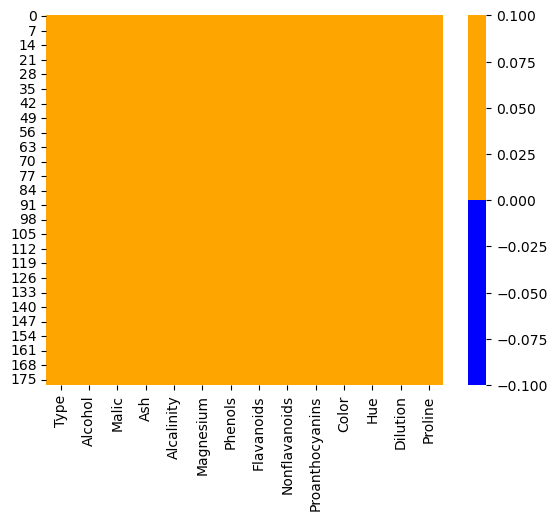

In [8]:
color=['blue','orange']
pal=sns.color_palette(color)
sns.heatmap(wine.isnull(),cmap=pal)

In [9]:
wine.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<Axes: >

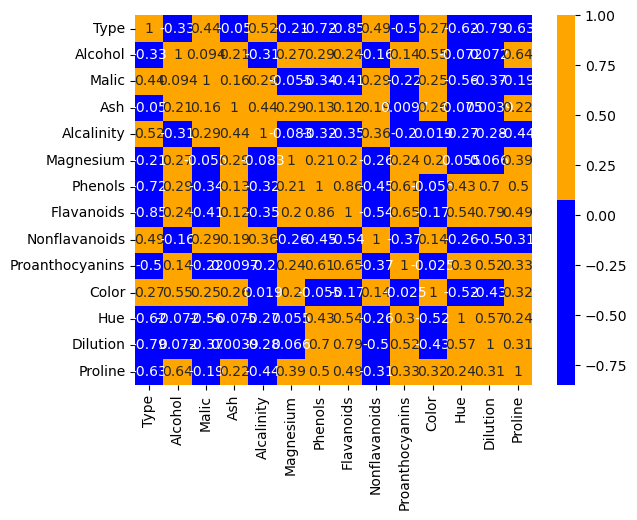

In [10]:
color=['blue','orange']
pal=sns.color_palette(color)
sns.heatmap(wine.corr(),cmap=pal ,annot=True)

In [11]:
wine.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [12]:
wine[wine.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


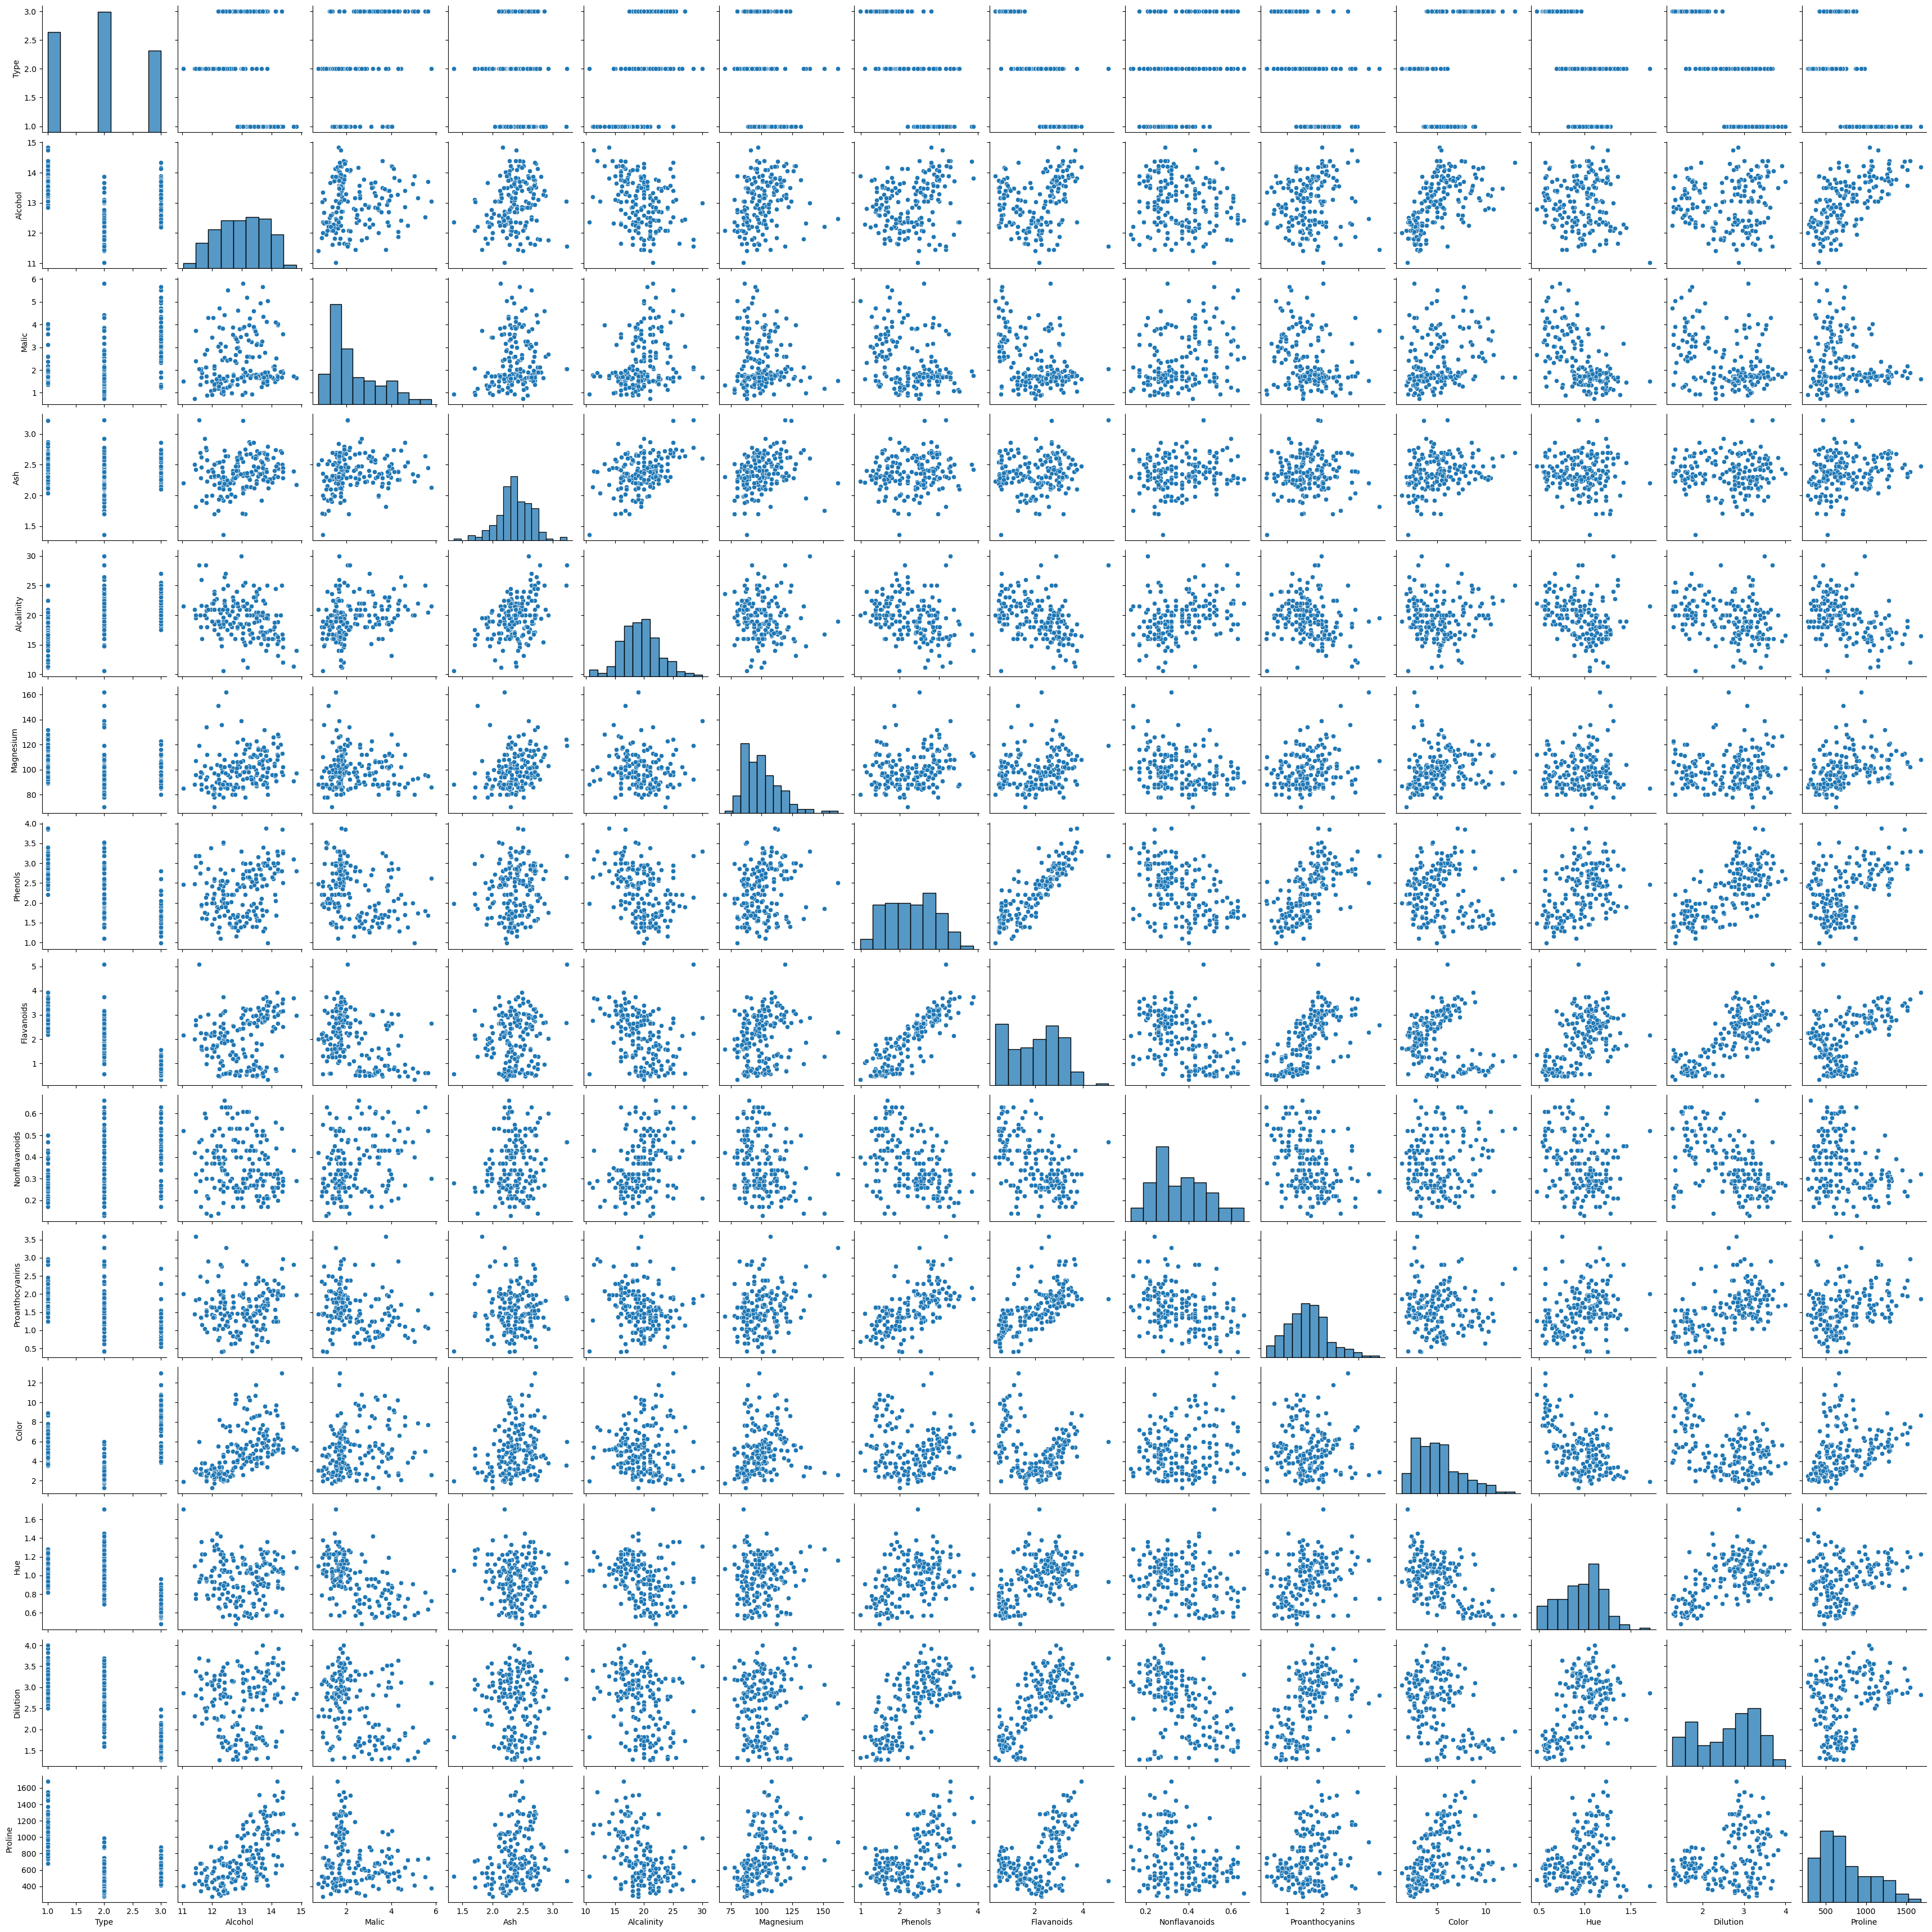

In [13]:
sns.pairplot(data=wine)

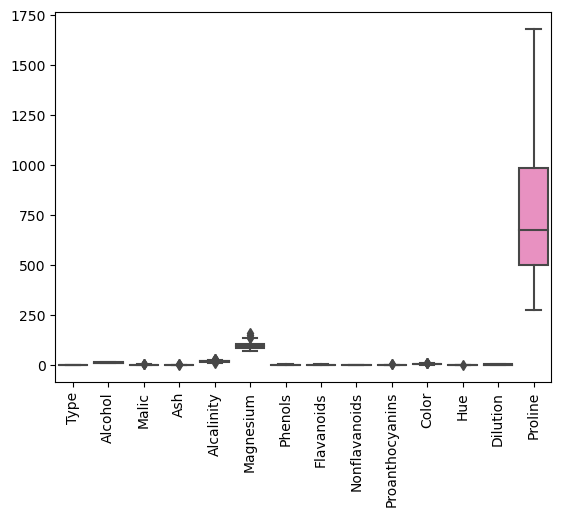

In [14]:
sns.boxplot(data=wine)
plt.xticks(rotation=90)
plt.show()

In [15]:
X=wine.iloc[:,1:]

In [16]:
X

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# scale the data

In [18]:
from sklearn.preprocessing import StandardScaler


In [19]:
scaler=StandardScaler()

In [20]:
scaled_df=scaler.fit_transform(X)

In [21]:
scaled_df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# build the model

In [23]:
from sklearn.decomposition import PCA

In [24]:
model=PCA(n_components=13)

In [25]:
pc_comps=model.fit_transform(scaled_df)

In [26]:
pc_comps

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [27]:
var=model.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [28]:
np.cumsum(var)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [29]:
wine_data=pd.DataFrame(data=pc_comps,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'])

In [30]:
wine_data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [31]:
pc_data=wine_data.iloc[:,0:3]

In [32]:
pc_data

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


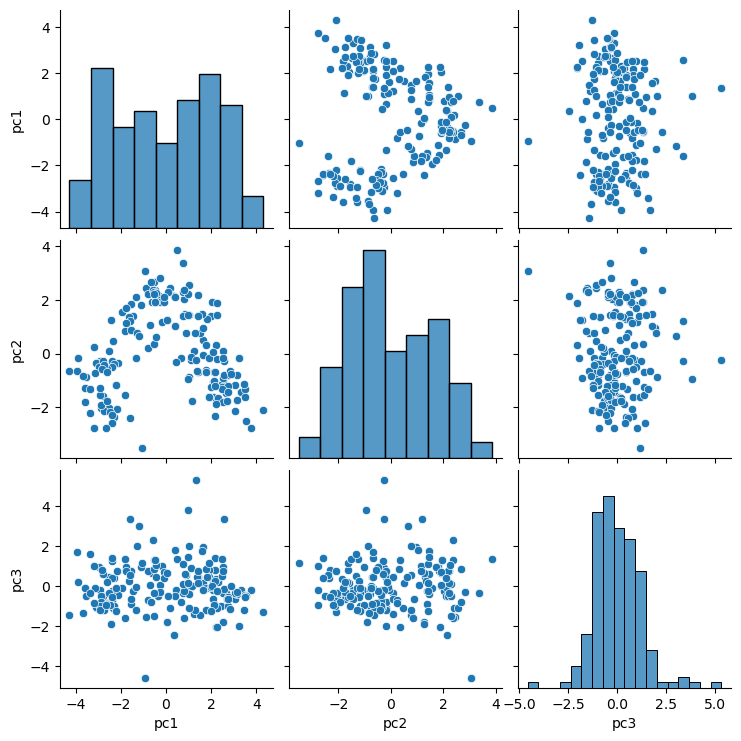

In [33]:
sns.pairplot(data=pc_data)

<Axes: >

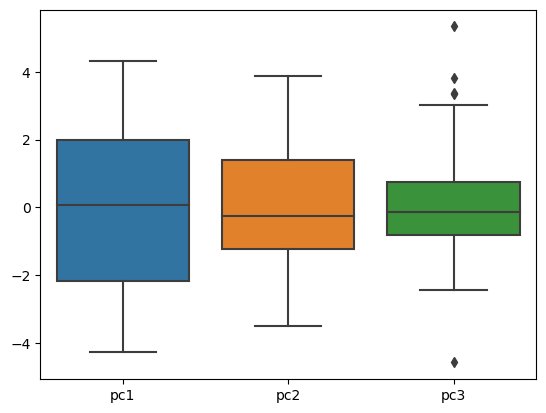

In [34]:
sns.boxplot(data=pc_data)

# scale the pc data

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
mn_scaler=MinMaxScaler()

In [38]:
scaled_mn=mn_scaler.fit_transform(pc_data)
scaled_mn

array([[0.88409355, 0.28044707, 0.44502757],
       [0.75524083, 0.52098937, 0.25765258],
       [0.79099786, 0.33626383, 0.56068773],
       [0.93533214, 0.10271162, 0.44397497],
       [0.6155344 , 0.35810263, 0.66580576],
       [0.85308182, 0.18853559, 0.39833717],
       [0.7831255 , 0.31681056, 0.36332375],
       [0.73778236, 0.25804241, 0.47644818],
       [0.79031526, 0.35157211, 0.28338035],
       [0.81856406, 0.36898588, 0.36260348],
       [0.9030599 , 0.2995525 , 0.41914796],
       [0.70232687, 0.39300963, 0.34179568],
       [0.7440692 , 0.38438229, 0.37460304],
       [0.9005487 , 0.32279689, 0.3404465 ],
       [1.        , 0.19211296, 0.33444109],
       [0.76637997, 0.25078783, 0.48366041],
       [0.75087591, 0.16079663, 0.54547303],
       [0.71910927, 0.25500921, 0.54176564],
       [0.91030363, 0.13493476, 0.4128317 ],
       [0.74070149, 0.33220437, 0.4451275 ],
       [0.86171036, 0.36932981, 0.42497329],
       [0.62457173, 0.44313012, 0.55606991],
       [0.

# Hyperparameter Tuning(elbow plot)

In [44]:
wcss=[]
for i in range(1,11):
    model= KMeans(n_clusters=i,random_state=42)
    model.fit(pc_data)
    wcss.append(model.inertia_)
wcss


[1539.5034801883064,
 886.1611364823492,
 512.9995067661514,
 429.6196798263025,
 370.91800660617105,
 325.0311346396021,
 287.7205659013953,
 266.6229565532756,
 241.44497427840494,
 217.67945500942477]

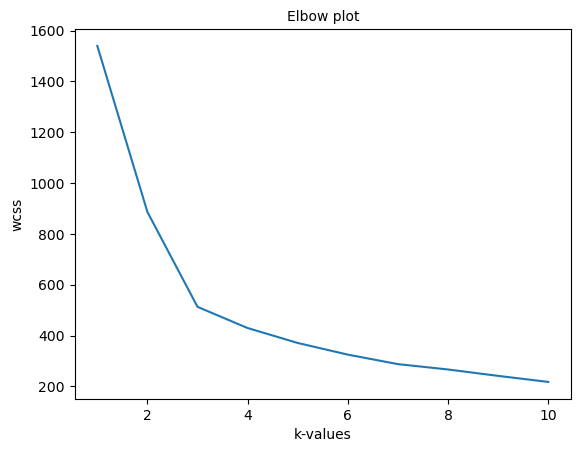

In [45]:
plt.plot(range(1,11),wcss)
plt.title('Elbow plot',fontsize=10)
plt.xlabel('k-values')
plt.ylabel('wcss')
plt.show()

# build the model

In [47]:
from sklearn.cluster import KMeans

In [48]:
fin_model=KMeans(n_clusters=3,random_state=42)

In [49]:
fin_model.fit(scaled_mn)

KMeans(n_clusters=3, random_state=42)

In [50]:
fin_model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [51]:
pc_data['kmean_Label']=fin_model.labels_
pc_data.head()

,pc1,pc2,pc3,kmean_Label
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2


In [52]:
kmean_grp=pc_data.groupby('kmean_Label')

In [53]:
for x,y in kmean_grp:
    print(x)

0
1
2


In [54]:
for x,y in kmean_grp:
    print(y)
    print(60*'-')

          pc1       pc2       pc3  kmean_Label
38   1.502195  0.769432 -1.426177            0
59  -0.928582  3.073486 -4.585064            0
60  -1.542480  1.381444 -0.874683            0
61  -1.836250  0.829984 -1.605702            0
62   0.030607  1.262786 -1.784408            0
..        ...       ...       ...          ...
125 -0.096810  2.109998  0.434826            0
126  0.038487  1.266762  0.687578            0
127 -1.597159  1.208144  3.361176            0
128 -0.479565  1.938841  1.296508            0
129 -1.792833  1.150288  0.782800            0

[68 rows x 4 columns]
------------------------------------------------------------
          pc1       pc2       pc3  kmean_Label
83  -2.538977  0.087443  0.474251            1
130 -1.327102 -0.170389 -1.180013            1
131 -2.384501 -0.374583 -0.723823            1
132 -2.936940 -0.263862 -0.167640            1
133 -2.146811 -0.368255 -0.453301            1
134 -2.369869  0.459635 -1.101400            1
135 -3.063842 -0.353413

In [55]:
kmean_grp.agg(['mean'])

,pc1,pc2,pc3
,mean,mean,mean
kmean_Label,,,
0,-0.076018,1.736061,0.105355
1,-2.743930,-1.214191,-0.177245
2,2.288882,-0.959947,0.024933


# visualise the data for KMeans_cluster(pc_data data set)

In [57]:
y_pc_data=pc_data.iloc[:,3]
y_pc_data

0      2
1      2
2      2
3      2
4      2
      ..
173    1
174    1
175    1
176    1
177    1
Name: kmean_Label, Length: 178, dtype: int32

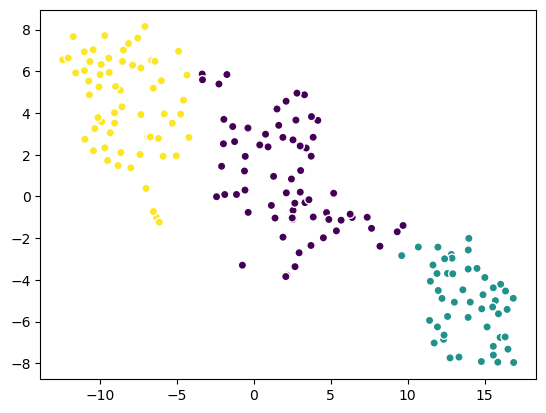

In [85]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y_pc_data,cmap='viridis',edgecolors='white')
plt.show()

# Hierarchical Agglomerative Clustering

# build the model

In [61]:
from sklearn.cluster import AgglomerativeClustering

In [62]:
hc_model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [63]:
hc_model.fit(scaled_mn)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [64]:
hc_model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [65]:
pc_data['hc_label']=hc_model.labels_
pc_data

,pc1,pc2,pc3,kmean_Label,hc_label
0,3.316751,-1.443463,-0.165739,2,2
1,2.209465,0.333393,-2.026457,2,2
2,2.516740,-1.031151,0.982819,2,2
3,3.757066,-2.756372,-0.176192,2,2
4,1.008908,-0.869831,2.026688,2,2
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1,0
174,-2.601956,-1.757229,0.207581,1,0
175,-2.677839,-2.760899,-0.940942,1,0
176,-2.387017,-2.297347,-0.550696,1,0


In [66]:
hc_grp=pc_data.groupby('hc_label')

In [67]:
for x,y in hc_grp:
    print(x)

0
1
2


In [68]:
for x,y in hc_grp:
    print(y)
    print(60*'-')

          pc1       pc2       pc3  kmean_Label  hc_label
60  -1.542480  1.381444 -0.874683            0         0
61  -1.836250  0.829984 -1.605702            0         0
64  -0.609681  1.908059  0.679358            0         0
68  -0.812805  0.220514 -0.707005            0         0
70  -1.572216  0.884983 -0.628998            0         0
..        ...       ...       ...          ...       ...
173 -3.370524 -2.216289 -0.342570            1         0
174 -2.601956 -1.757229  0.207581            1         0
175 -2.677839 -2.760899 -0.940942            1         0
176 -2.387017 -2.297347 -0.550696            1         0
177 -3.208758 -2.768920  1.013914            1         0

[81 rows x 5 columns]
------------------------------------------------------------
          pc1       pc2       pc3  kmean_Label  hc_label
59  -0.928582  3.073486 -4.585064            0         1
62   0.030607  1.262786 -1.784408            0         1
63   2.050262  1.925033 -0.007369            0         1
66  

In [69]:
hc_grp.agg(['mean'])

,pc1,pc2,pc3,kmean_Label
,mean,mean,mean,mean
hc_label,,,,
0,-2.050921,-0.138209,0.145108,0.604938
1,0.692043,2.043865,-0.340533,0.000000
2,2.238862,-0.878947,-0.008064,1.906250


# Plot the dendrogram

In [71]:
from scipy.cluster import hierarchy

In [72]:
hr=hierarchy.linkage(scaled_mn,method='complete')

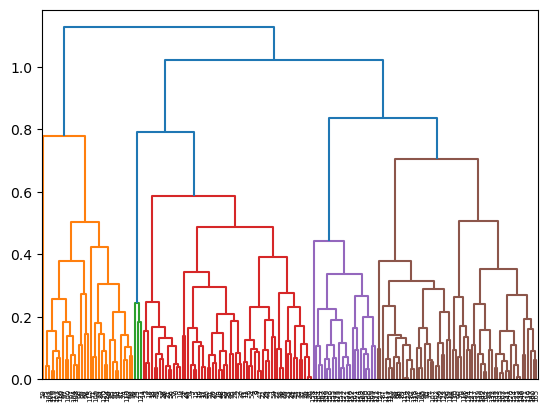

In [73]:
dn=hierarchy.dendrogram(hr)

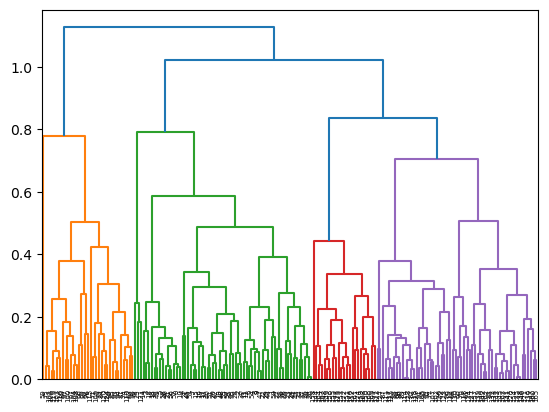

In [86]:
dn=hierarchy.dendrogram(hr,color_threshold=0.8)

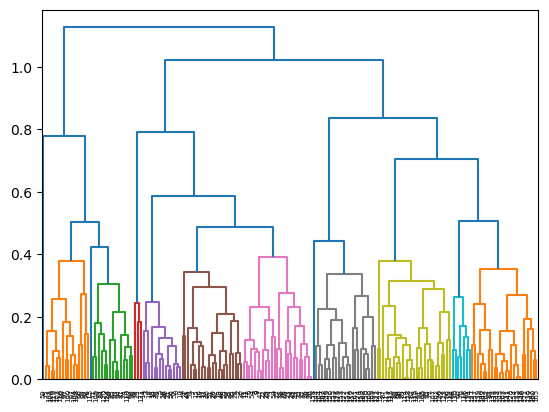

In [87]:
dn=hierarchy.dendrogram(hr,color_threshold=0.4)

In [74]:
X=pc_data.iloc[:,0:3]
y=pc_data.iloc[:,4]

In [75]:
X

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [76]:
y

0      2
1      2
2      2
3      2
4      2
      ..
173    0
174    0
175    0
176    0
177    0
Name: hc_label, Length: 178, dtype: int64

# visualise the data for Hierarchical Agglomerative Clustering_cluster(pc_data data set)

In [78]:
from sklearn.manifold import TSNE

In [79]:
model=TSNE(n_components=2)


In [80]:
tsne_comps=model.fit_transform(X)
tsne_comps

array([[-1.06615992e+01,  6.46952581e+00],
       [-4.89603662e+00,  6.96530342e+00],
       [-8.64651108e+00,  2.10510373e+00],
       [-1.24210205e+01,  6.55160236e+00],
       [-7.01107597e+00,  3.86450469e-01],
       [-1.15800810e+01,  5.92706347e+00],
       [-8.53972912e+00,  6.47673273e+00],
       [-9.88745689e+00,  3.58119321e+00],
       [-7.55105639e+00,  7.60143661e+00],
       [-8.48086834e+00,  7.01884222e+00],
       [-1.04459372e+01,  7.03679085e+00],
       [-6.64841700e+00,  6.52569914e+00],
       [-7.34551001e+00,  6.16014051e+00],
       [-9.69525814e+00,  7.71533012e+00],
       [-1.17365026e+01,  7.66867304e+00],
       [-1.01319237e+01,  3.78335476e+00],
       [-1.04284019e+01,  2.19212317e+00],
       [-9.68413925e+00,  2.33242917e+00],
       [-1.20654755e+01,  6.63878822e+00],
       [-8.57483768e+00,  4.30032921e+00],
       [-9.43228245e+00,  6.63478708e+00],
       [-5.89873934e+00,  1.92878866e+00],
       [-6.53616381e+00,  5.19443130e+00],
       [-4.

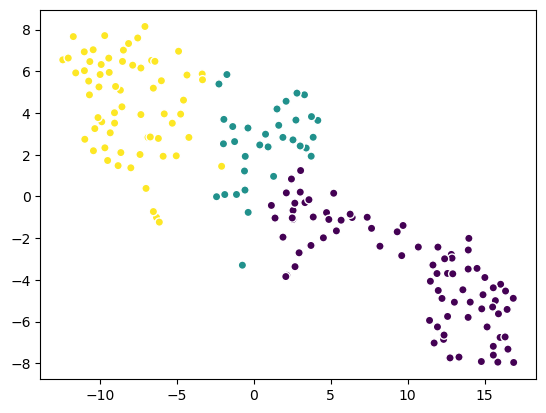

In [81]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y,cmap='viridis',edgecolors='white')
plt.show()

In [82]:
pc_data['Test_data']=wine['Type']
pc_data

,pc1,pc2,pc3,kmean_Label,hc_label,Test_data
0,3.316751,-1.443463,-0.165739,2,2,1
1,2.209465,0.333393,-2.026457,2,2,1
2,2.516740,-1.031151,0.982819,2,2,1
3,3.757066,-2.756372,-0.176192,2,2,1
4,1.008908,-0.869831,2.026688,2,2,1
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1,0,3
174,-2.601956,-1.757229,0.207581,1,0,3
175,-2.677839,-2.760899,-0.940942,1,0,3
176,-2.387017,-2.297347,-0.550696,1,0,3


In [83]:
pc_components =pc_data.iloc[:,3:6]

In [84]:
pc_components 

,kmean_Label,hc_label,Test_data
0,2,2,1
1,2,2,1
2,2,2,1
3,2,2,1
4,2,2,1
...,...,...,...
173,1,0,3
174,1,0,3
175,1,0,3
176,1,0,3
